In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from utils_plotting import val_map, display_dict
from utils_scaling import fit, plot_contours

import jax.numpy as jnp

In [4]:
df = pd.read_csv("data/temp.csv")
df_big = pd.read_csv("data/extrapolation.csv")

In [5]:
def get_data(drop_df, key = "train/CrossEntropyLoss"):
    drop_df = drop_df.dropna(subset=[key])

    N = jnp.array(drop_df["params"], dtype=jnp.float32)
    D = jnp.array(drop_df["tokens"], dtype=jnp.float32)
    L = jnp.array(drop_df[key], dtype=jnp.float32)
    return N, D, L


In [6]:
formats = ["fp4_e2m1", "float16", "fp16", "bfloat16", "bf16", "fp8_e5m2", "fp8_e4m3", "fp6_e3m2", "fp6_e2m3", "fp4", "int8", "int4"]

w_format = fp4_e2m1


KeyError: ['val_loss']

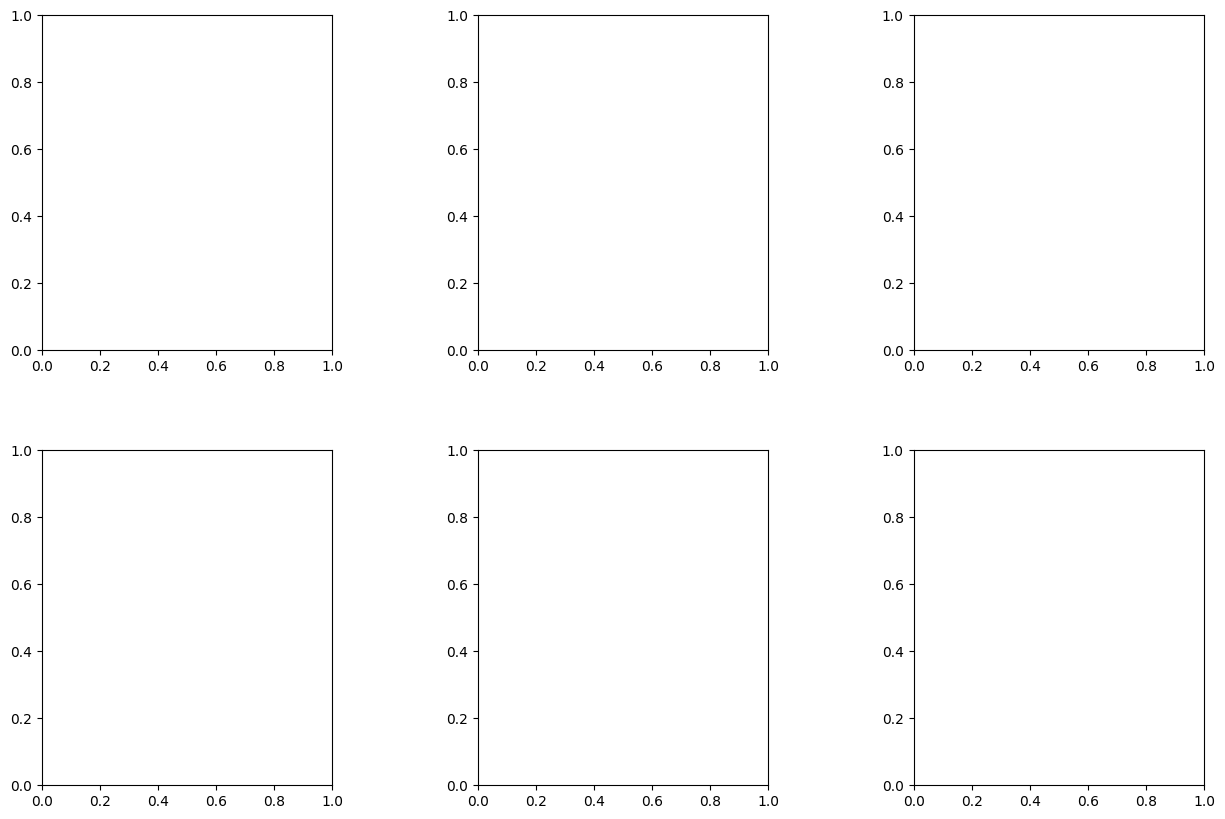

In [7]:
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for i, a_format in enumerate(formats):
    # for i, data in enumerate(val_map.keys()):
            for loss_name in ["val_loss"]:
                ax = axs[i]
                print(f"w_format = {w_format}")

                # drop_df = df[df["data"] == data]
                drop_df = df[(df["model.w_mx_format"] == w_format) & (df["model.a_mx_format"] == a_format)]

                N, D, L = get_data(drop_df, loss_name)

                params, _ = fit(N, D, L, kaplan=kaplan)
                print(f"Loss: {params['loss']}")

                # df_big_data = df_big[df_big["data"] == data]
                df_big_data = df_big[(df_big["model.w_mx_format"] == w_format) & (df_big["model.a_mx_format"] == a_format)]
                x = np.array(df_big_data["iso_flop"])
                y = np.array(df_big_data["params"])
                z = np.array(df_big_data["val_loss"])
                extrapolation = (x,y,z)
                masks = np.ones(5)
                vals = np.zeros(5)
                plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                # ax.set_title(f"{display_dict[data]}")
                ax.set_title(f"{w_format}_{a_format}")

                params["kaplan"] = kaplan
                params["w_format"] = w_format
                params["a_format"] = a_format
                # params["loss_name"] = val_map[data]
                params = pd.DataFrame([params.values], columns=params.index, index = [i])
                plot_params_df = pd.concat([plot_params_df, params])

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()

In [6]:
# latex tabel of params
for kaplan in [True, False]:
    for i, data in enumerate(val_map.keys()):
        a, b, e, alpha, beta = plot_params_df[(plot_params_df["data"] == data) & (plot_params_df["kaplan"] == kaplan)].values[0][:5]
        print(f"{display_dict[data]} & {a:.2e} & {b:.2e} & {e:.2f} & {alpha:.2f} & {beta:.2f} & {beta / (alpha + beta):.2f} \\\\")
    print()

SmolLM Corpus & 7.79e+07 & 1.06e+09 & 1.53 & 0.42 & 0.45 & 0.52 \\
FineWeb-Edu & 6.68e+07 & 8.90e+08 & 1.97 & 0.41 & 0.46 & 0.52 \\
SlimPajama & 7.47e+07 & 1.06e+09 & 1.97 & 0.40 & 0.43 & 0.52 \\
FineWeb & 6.79e+07 & 9.31e+08 & 2.17 & 0.41 & 0.45 & 0.52 \\
ProofPile 2 & 2.14e+07 & 3.29e+08 & 1.32 & 0.45 & 0.46 & 0.50 \\
StarCoder & 2.23e+07 & 3.78e+08 & 0.85 & 0.45 & 0.47 & 0.51 \\

SmolLM Corpus & 2.44e+03 & 6.92e+03 & 1.55 & 0.45 & 0.44 & 0.50 \\
FineWeb-Edu & 2.52e+03 & 7.16e+03 & 2.00 & 0.45 & 0.45 & 0.50 \\
SlimPajama & 2.05e+03 & 6.02e+03 & 2.01 & 0.44 & 0.44 & 0.50 \\
FineWeb & 1.64e+03 & 4.20e+03 & 2.15 & 0.43 & 0.42 & 0.50 \\
ProofPile 2 & 3.77e+03 & 3.59e+03 & 1.33 & 0.51 & 0.43 & 0.46 \\
StarCoder & 7.75e+03 & 4.19e+03 & 0.86 & 0.55 & 0.44 & 0.45 \\

